In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress convergence warnings specific to Logistic Regression
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
# reading datasets
df_train = pd.read_csv('loan-train.csv')
df_test = pd.read_csv('loan-test.csv')

In [4]:
#prnt shape od datasets
print('Train dataset shape:', df_train.shape)
print('-------------------------------------------------------------------------------------------')
print('Test dataset shape:', df_test.shape)

Train dataset shape: (614, 13)
-------------------------------------------------------------------------------------------
Test dataset shape: (367, 12)


In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# plotting crosstab
pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], margins =True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


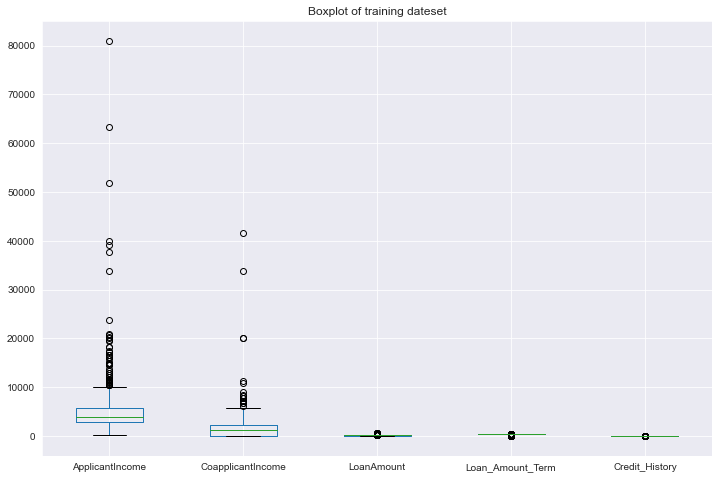

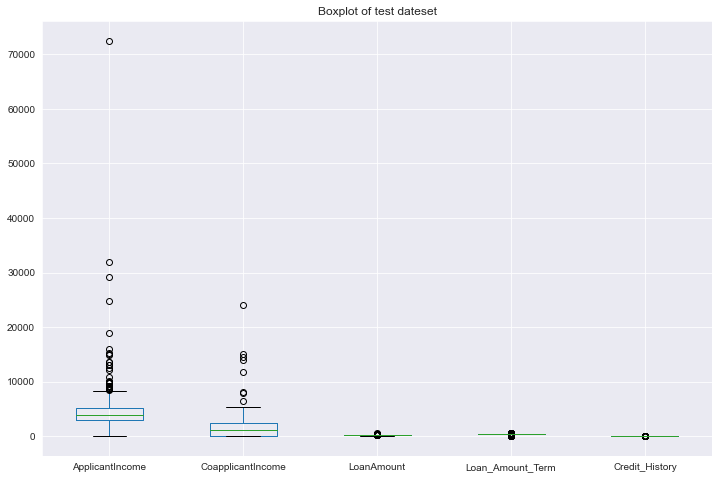

In [8]:
# checking for outliers
plt.figure(figsize=(12, 8))
df_train.boxplot()

# plotting boxplot for training data
plt.title('Boxplot of training dateset')


plt.figure(figsize=(12, 8))
df_test.boxplot()

# plotting boxplot for test data
plt.title('Boxplot of test dateset')


# Show the plot
plt.show()

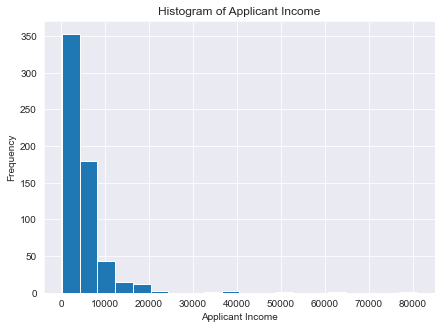

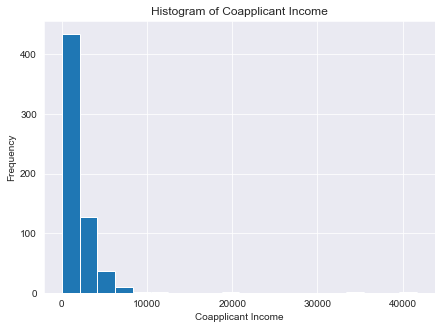

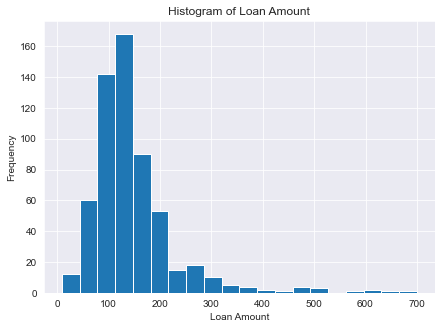

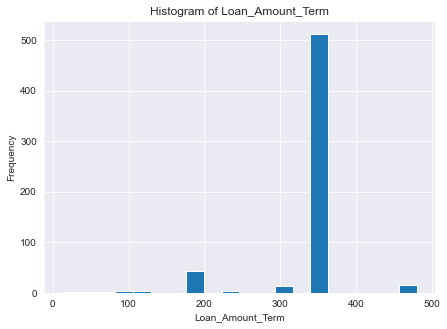

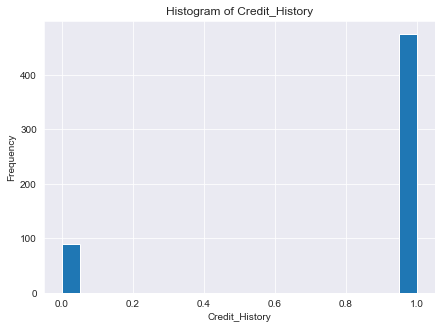

In [9]:
plt.figure(figsize=(7, 5))
df_train['ApplicantIncome'].hist(bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')

plt.figure(figsize=(7, 5))
df_train['CoapplicantIncome'].hist(bins=20)
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Coapplicant Income')

plt.figure(figsize=(7, 5))
df_train['LoanAmount'].hist(bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')

plt.figure(figsize=(7, 5))
df_train['Loan_Amount_Term'].hist(bins=20)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.title('Histogram of Loan_Amount_Term')

plt.figure(figsize=(7, 5))
df_train['Credit_History'].hist(bins=20)
plt.xlabel('Credit_History')
plt.ylabel('Frequency')
plt.title('Histogram of Credit_History')

plt.show()


<Figure size 504x360 with 0 Axes>

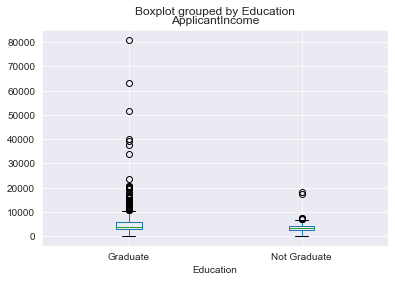

In [10]:
plt.figure(figsize=(7, 5))
df_train.boxplot(column='ApplicantIncome', by='Education')
plt.show()

In [11]:
df_train['ApplicantIncome_log'] = np.log(df_train['ApplicantIncome'])


df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])

df_train['Loan_Amount_Term-log'] = np.log(df_train['Loan_Amount_Term'])


<AxesSubplot:>

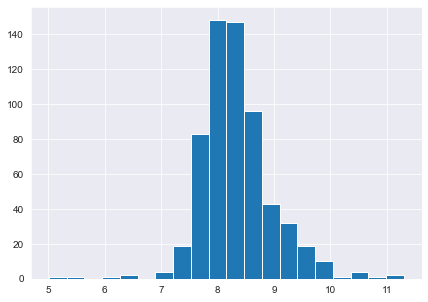

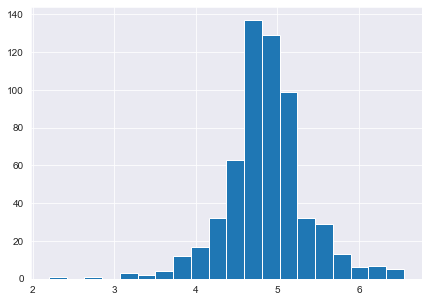

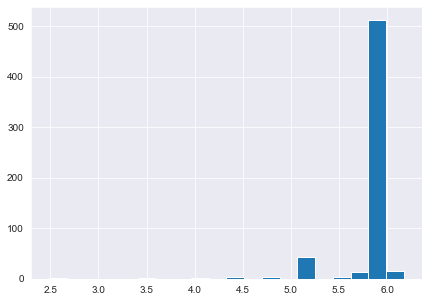

In [12]:
plt.figure(figsize=(7, 5))
df_train['ApplicantIncome_log'].hist(bins=20) 


plt.figure(figsize=(7, 5))
df_train['LoanAmount_log'].hist(bins=20) 

plt.figure(figsize=(7, 5))
df_train['Loan_Amount_Term-log'].hist(bins=20) 


<AxesSubplot:>

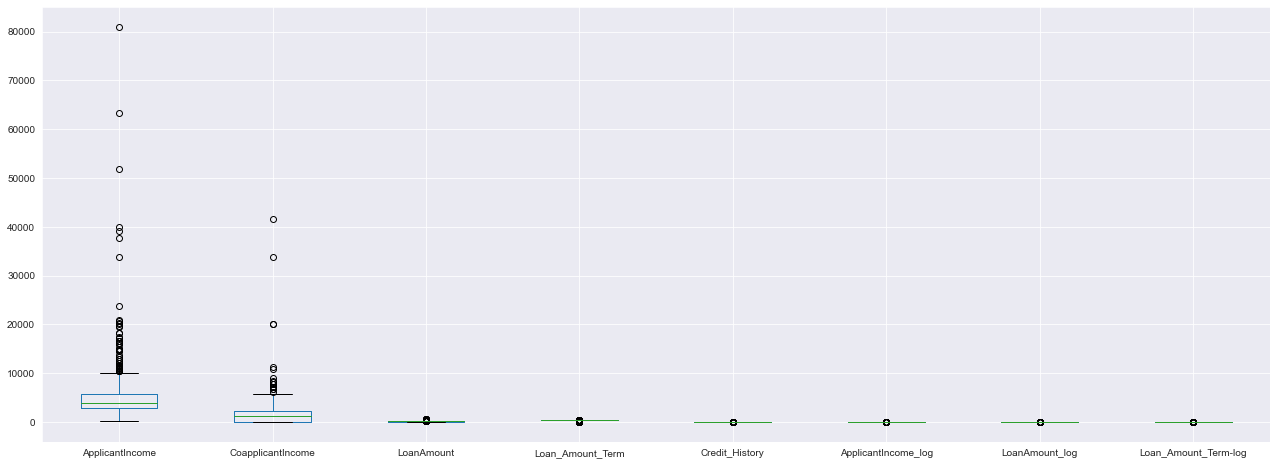

In [13]:
plt.figure(figsize=(22, 8))
df_train.boxplot()

In [14]:
df_train.isnull().sum()

Loan_ID                  0
Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
ApplicantIncome_log      0
LoanAmount_log          22
Loan_Amount_Term-log    14
dtype: int64

In [15]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True) # Mode
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True) # Mode

df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True) # Mode
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True) # Mode

df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True) # Mode
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True) # Mode

df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True) # Mode
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True) # Mode

df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True) # Mean
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True) # Mean

df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True) # Mode
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace=True) # Mode

df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True) # Mode
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True) # Mode

df_train['LoanAmount_log'].fillna(df_train['LoanAmount_log'].mean(), inplace=True) # mean


df_train['Loan_Amount_Term-log'].fillna(df_train['Loan_Amount_Term-log'].mode()[0], inplace=True) # mode

In [16]:
df_train.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
Loan_Amount_Term-log    0
dtype: int64

In [17]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])

<AxesSubplot:>

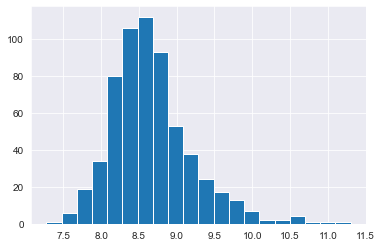

In [18]:
df_train['TotalIncome_log'].hist(bins=20)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            614 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         614 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  ApplicantIncome_log   614 non-null    float64
 14  LoanAmount_log        614 non-null    float64
 15  Loan_Amount_Term-log  6

In [20]:
df_train.Loan_Status = df_train.Loan_Status.replace({"Y": 1, "N" : 0})


df_train.Gender = df_train.Gender.replace({"Male": 1, "Female" : 0})
df_test.Gender = df_test.Gender.replace({"Male": 1, "Female" : 0})

df_train.Married = df_train.Married.replace({"Yes": 1, "No" : 0})
df_test.Married = df_test.Married.replace({"Yes": 1, "No" : 0})

df_train.Self_Employed = df_train.Self_Employed.replace({"Yes": 1, "No" : 0})
df_test.Self_Employed = df_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [21]:
from sklearn.preprocessing import LabelEncoder
feature_col =['Gender', 'Married', 'Property_Area','Education', 'Self_Employed', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    df_train[col] = le.fit_transform(df_train[col])


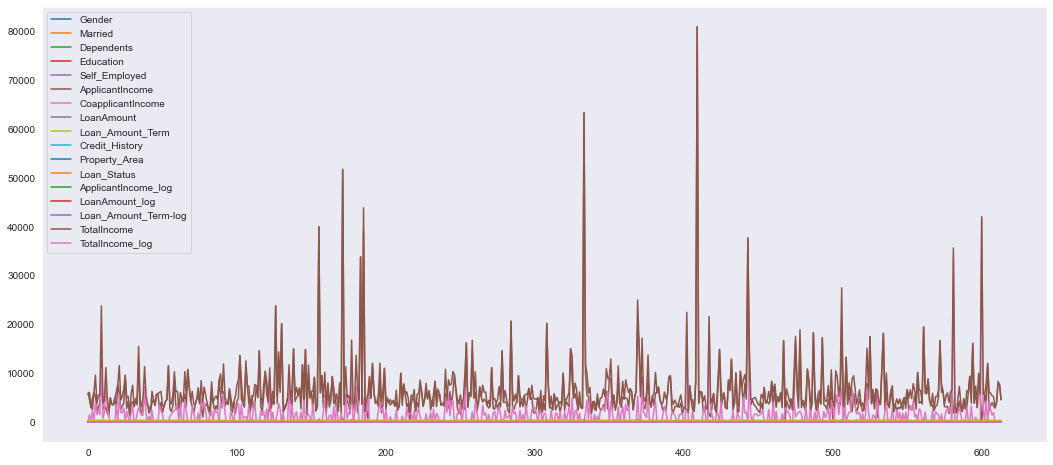

In [22]:
df_train.plot(figsize=(18, 8))

plt.show()


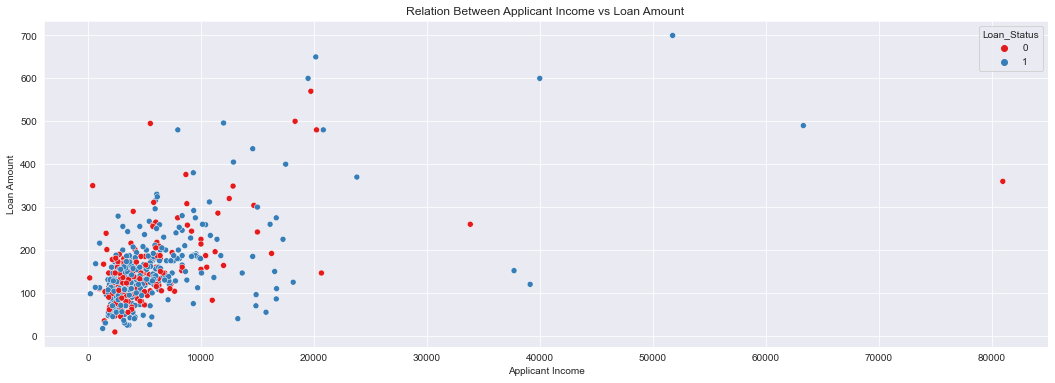

In [23]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount ")

sns.scatterplot(data=df_train, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', palette='Set1')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.grid()
plt.show()

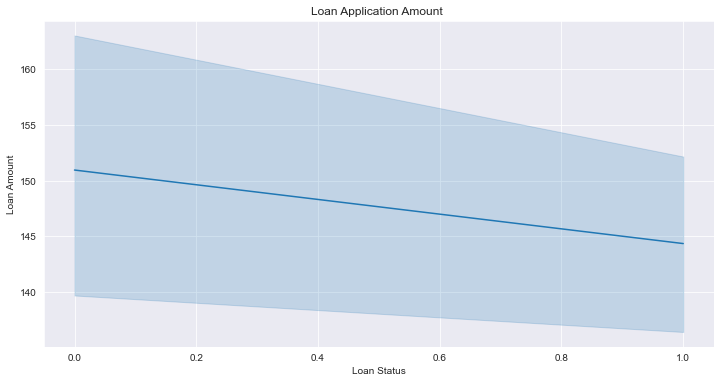

In [24]:
plt.figure(figsize=(12, 6))
plt.title("Loan Application Amount ")

sns.lineplot(data=df_train, x='Loan_Status', y='LoanAmount')
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.grid()
plt.show()

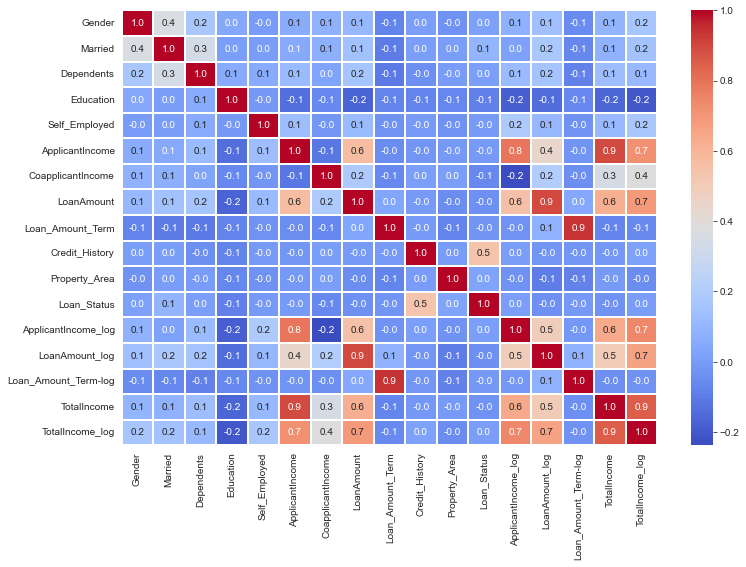

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    int64  
 2   Married               614 non-null    int64  
 3   Dependents            614 non-null    int32  
 4   Education             614 non-null    int32  
 5   Self_Employed         614 non-null    int64  
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  Property_Area         614 non-null    int32  
 12  Loan_Status           614 non-null    int64  
 13  ApplicantIncome_log   614 non-null    float64
 14  LoanAmount_log        614 non-null    float64
 15  Loan_Amount_Term-log  6

In [27]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term','ApplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term-log']
X = df_train[features]
target = ['Loan_Status']
y = df_train[target]

# Logistic regression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# instanciating logistic model
logistic_model = LogisticRegression()

# fitting training data
logistic_model.fit(X_train, y_train)

#prediction 
pred1 = logistic_model.predict(X_test)

# getting accuracy
test_accuracy = accuracy_score(y_test, pred1)

# printing accuracy score
print('logistic regression accuracy:', test_accuracy)

logistic regression accuracy: 0.7886178861788617


In [30]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear'],  # Optimization algorithm
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}



# Instantiate GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
pred_tuned1 = best_model.predict(X_test)
test_accuracy_tuned = accuracy_score(y_test, pred_tuned1)
print('accuracy score for tuned logistic regression:', test_accuracy_tuned)

accuracy score for tuned logistic regression: 0.7886178861788617


# Decision Tree model

In [31]:
# Instantiate DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the training and testing sets
pred2 = decision_tree.predict(X_test)

# getting accuracy
test_accuracy_tree = accuracy_score(y_test, pred2)

print('Decision tree accuracy:', test_accuracy_tree)

Decision tree accuracy: 0.7073170731707317


In [32]:
# Define the parameter grid to search over
param_grid_tree = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}



# Instantiate GridSearchCV
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_tree.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_tree = grid_search.best_params_
best_score_tree = grid_search.best_score_


# Get the best model
best_decision_tree = grid_search.best_estimator_

# getting tree prediction
pred_tuned2 = best_decision_tree.predict(X_test)

# Evaluate the best model on the testing set
test_accuracy_tree = accuracy_score(y_test, pred_tuned2)
print("Testing Accuracy od tuned decision tree model:", test_accuracy_tree)


Testing Accuracy od tuned decision tree model: 0.7886178861788617


# GaussianNB model

In [33]:
# instantiating gaussiannb model
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
pred3 = gnb.predict(X_test)

# accuracy score of guassian nb
test_accuracy_guassian = accuracy_score(y_test, pred3)
print("Testing Accuracy of guassiannb model:", test_accuracy_guassian)

Testing Accuracy of guassiannb model: 0.7804878048780488


# XGBoost model

In [34]:
# Instantiate XGBClassifier
xgb_classifier = XGBClassifier()

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
pred4 = xgb_classifier.predict(X_test)

# Calculate accuracy
test_accuracy_xgboost = accuracy_score(y_test, pred4)
print("Accuracy score for xgboost model:", test_accuracy_xgboost)


Accuracy score for xgboost model: 0.7642276422764228


In [35]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.5, 0.7, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 1.0],  # Subsample ratio of columns when constructing each tree
}



# Instantiate GridSearchCV
grid_search_xgboost = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_xgboost.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_xg = grid_search_xgboost.best_params_
best_score_xg = grid_search_xgboost.best_score_

# Get the best model
best_xgb_classifier = grid_search_xgboost.best_estimator_

# Evaluate the best model on the testing set
pred_tuned4 = best_xgb_classifier.predict(X_test)

test_accuracy_xgboost_tuned = accuracy_score(y_test, pred_tuned4)
print("Accuracy score for tuned xgboost model:", test_accuracy_xgboost_tuned)


Accuracy score for tuned xgboost model: 0.7886178861788617


# Random forest model

In [36]:
# Instantiate RandomForestClassifier
random_forest = RandomForestClassifier()

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
pred5 = random_forest.predict(X_test)

# accurscy score
test_accuracy_forest = accuracy_score(y_test, pred5)
print('Accuracy score for random forest model:', test_accuracy_forest)



Accuracy score for random forest model: 0.7642276422764228


In [37]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}


# Instantiate GridSearchCV
grid_search_forest = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_forest.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_forest = grid_search_forest.best_params_
best_score_forest = grid_search_forest.best_score_



# Get the best model
best_random_forest = grid_search_forest.best_estimator_

#predict with best nmodel
pred_tuned5 = best_random_forest.predict(X_test)
# Evaluate the best model on the testing set
test_accuracy_forest_tuned = accuracy_score(y_test, pred_tuned5)
print("Accuracy score for tuned random forest:", test_accuracy_forest_tuned)


Accuracy score for tuned random forest: 0.7642276422764228


In [38]:
accuracy_scores =[test_accuracy, test_accuracy_tuned, test_accuracy_tree, test_accuracy_tree, test_accuracy_guassian, test_accuracy_xgboost, test_accuracy_xgboost_tuned, test_accuracy_forest, test_accuracy_forest_tuned]
models = ['LogisticRegression', 'Gridsearch tuned LogisticRegression', 'DecisionTreeClassifier', 'Gridsearch tuned DecisionTreeClassifier', 'GaussianNB', 'XGBoost', 'Gridsearch tuned XGBoost', 'RandomForestClassifier', 'Gridsearch tuned RandomForestClassifier']

# Create a dataframe
df = pd.DataFrame({
    'Model': models,
    'Accuracy Score': accuracy_scores
})

# Display the dataframe
df.head(9)

,Model,Accuracy Score
0,LogisticRegression,0.788618
1,Gridsearch tuned LogisticRegression,0.788618
2,DecisionTreeClassifier,0.788618
3,Gridsearch tuned DecisionTreeClassifier,0.788618
4,GaussianNB,0.780488
5,XGBoost,0.764228
6,Gridsearch tuned XGBoost,0.788618
7,RandomForestClassifier,0.764228
8,Gridsearch tuned RandomForestClassifier,0.764228


# Predicting Using The Best Performing Model

In [39]:
df_test['ApplicantIncome_log'] = np.log(df_test['ApplicantIncome'])
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['Loan_Amount_Term-log'] = np.log(df_test['Loan_Amount_Term'])
df_test['LoanAmount_log'].fillna(df_test['LoanAmount_log'].mean(), inplace=True) # mean
df_test['Loan_Amount_Term-log'].fillna(df_test['Loan_Amount_Term-log'].mode()[0], inplace=True) # mode
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])

In [40]:
feature_col1 = ['Gender', 'Married', 'Property_Area','Education', 'Self_Employed', 'Dependents']
le = LabelEncoder()
for col in feature_col1:
    df_test[col] = le.fit_transform(df_test[col])

In [41]:
df_test.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
ApplicantIncome_log     0
LoanAmount_log          0
Loan_Amount_Term-log    0
TotalIncome             0
TotalIncome_log         0
dtype: int64

In [42]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term','ApplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term-log']
x_test = df_train[features]


In [51]:
x_test['Dependents'].unique()

array([0, 1, 2, 3])

In [44]:
best_random_forest.predict(x_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [45]:
import pickle

In [46]:
pickle.dump(best_decision_tree, open('model_loan.pkl', 'wb'))


In [47]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,LoanAmount,Loan_Amount_Term,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term-log
83,1,1,0,0,0,1.0,1,6000,265.000000,360.0,8.699515,5.579730,5.886104
90,1,1,0,0,0,1.0,1,2958,131.000000,360.0,7.992269,4.875197,5.886104
227,1,1,2,0,0,1.0,1,6250,210.000000,360.0,8.740337,5.347108,5.886104
482,1,1,0,0,0,1.0,1,2083,128.000000,360.0,7.641564,4.852030,5.886104
464,1,0,0,0,0,0.0,1,4166,98.000000,360.0,8.334712,4.584967,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1.0,1,1875,97.000000,360.0,7.536364,4.574711,5.886104
106,1,1,2,0,0,1.0,2,11417,225.000000,360.0,9.342859,5.416100,5.886104
270,0,0,0,0,0,1.0,2,3237,30.000000,360.0,8.082402,3.401197,5.886104
435,0,1,0,0,0,1.0,1,10047,146.412162,240.0,9.215029,4.857444,5.480639
